In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
ratings="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/ratings.csv"
movies="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/movies.csv"

df_ratings = pd.read_csv(ratings, sep=',')
df_ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
df_movies = pd.read_csv(movies, sep=',')
df_movies.columns = ['itemId', 'title', 'genres']

2

In [ ]:
df_movies.head(20)

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
df_ratings.head(20)

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
df_ratings = df_ratings.fillna(0)
df_ratings.head()

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


4

In [ ]:
gk = df_ratings.groupby('userId') 

In [ ]:
gk.first()

,itemId,rating,timestamp
userId,,,
1,1,4.0,964982703
2,318,3.0,1445714835
3,31,0.5,1306463578
4,21,3.0,986935199
5,1,4.0,847434962
...,...,...,...
606,1,2.5,1349082950
607,1,4.0,964744033
608,1,2.5,1117408267


In [ ]:
df_rat = gk.get_group(10)

In [ ]:
df_rat['rating'].describe()

count    140.000000
mean       3.278571
std        1.175700
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [ ]:
numrat = df_ratings.groupby('rating').count()


3

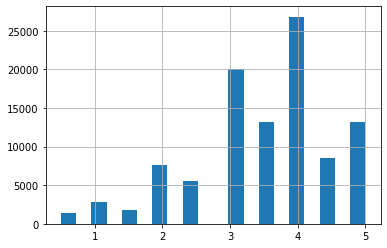

In [ ]:
df_ratings['rating'].hist(bins=20)

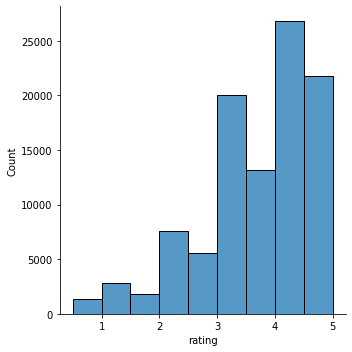

In [ ]:
sns.displot(df_ratings, x="rating", binwidth=.5)


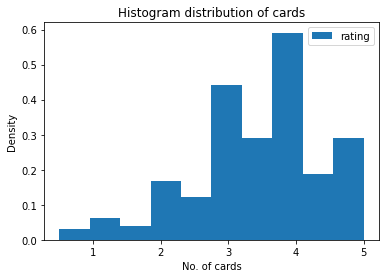

In [ ]:
df_ratings[['rating']].plot(kind='hist', alpha = 1, density = True, rwidth=1)
plt.title('Histogram distribution of cards')
plt.xlabel('No. of cards')
plt.ylabel('Density')
plt.show()

In [ ]:
from datetime import datetime 

In [ ]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'],unit='s')

In [ ]:
df_ratings.head(3)

,userId,itemId,rating,timestamp
0,1,1,4.0,2000-07-30
1,1,3,4.0,2000-07-30
2,1,6,4.0,2000-07-30


In [ ]:
df_ratings.set_index('timestamp', inplace=True)

In [ ]:
df_ratings['Year'] = df_ratings.index.year

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   itemId     100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


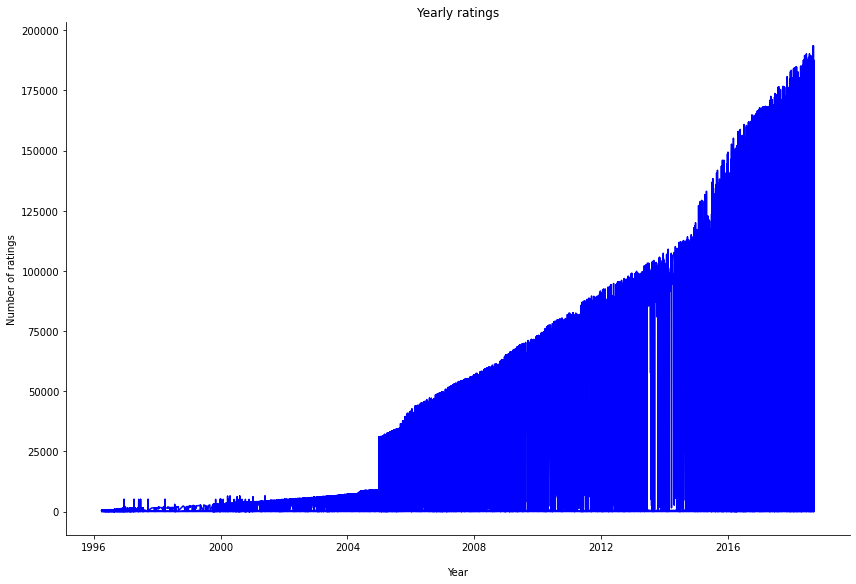

In [ ]:
df_ratings.plot(figsize=(12,8),color='blue')
plt.ylabel('Number of ratings')
plt.xlabel('Year',labelpad=15)
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Yearly ratings')
sns.despine(top=True)
plt.show()

6

In [ ]:
df_rat = df_ratings.pivot(index='userId',columns='itemId',values='rating')  
print (df_rat)

itemId  1       2       3       4       ...  193583  193585  193587  193609
userId                                  ...                                
1          4.0     NaN     4.0     NaN  ...     NaN     NaN     NaN     NaN
2          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
3          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
4          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
5          4.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
...        ...     ...     ...     ...  ...     ...     ...     ...     ...
606        2.5     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
607        4.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
608        2.5     2.0     2.0     NaN  ...     NaN     NaN     NaN     NaN
609        3.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
610        5.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN

[610 rows x

In [ ]:
df_rat = df_rat.fillna(0)
df_rat.head()

itemId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_user_item = df_ratings.pivot(index='userId',columns='itemId',values='rating') 
################################

# Sort index/rows (userId's) and columns (itemId's)
df_user_item.sort_index(axis=0, inplace=True)
df_user_item.sort_index(axis=1, inplace=True)
df_user_item = df_user_item.fillna(0)
#df_user_item.head()

In [ ]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and movies
    - 2 mapping disctionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}

    items = pd.DataFrame(data_encoded.itemId.unique(),columns=['itemId']) # df of all unique items
    dict_items = items.to_dict()    
    inv_dict_items = {v: k for k, v in dict_items['itemId'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.itemId = data_encoded.itemId.map(inv_dict_items)

    return data_encoded, dict_users, dict_items

7

In [ ]:
t = df_rat.loc[10][:30]

In [ ]:
print(t)

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
Name: 10, dtype: float64


8

In [ ]:
df_rat.loc[21][:]

itemId
1         3.5
2         3.5
3         0.0
4         0.0
5         0.0
         ... 
193581    0.0
193583    0.0
193585    0.0
193587    0.0
193609    0.0
Name: 21, Length: 9724, dtype: float64

In [ ]:
item_rated_user_21 = df_rat.loc[21].dropna().index
item_rated_user_21

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='itemId', length=9724)

9

In [ ]:
def SGD(data,           # dataframe containing 1 user|item|rating per row
        n_factors, # number of factors
        alpha,    # number of factors
        n_epochs,   # number of iteration of the SGD procedure
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''

    # Encoding userId's and itemId's in data
    data, dict_users, dict_items = encode_ids(data)
    
    ##### FILL HERE (2 lines) ######
    n_users = 9724  # number of unique users
    n_items = 9724  # number of unique items
    ################################
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .01, (n_users, n_factors))
    q = np.random.normal(0, .01, (n_items, n_factors))

    # Optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        # Loop over the rows in data
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            u = int(row.userId)      # current userId = position in the p vector (thanks to the encoding)
            i = int(row.itemId)      # current itemId = position in the q vector
            r_ui = float(row.rating) # rating associated to the couple (user u , item i)
            
            ##### FILL HERE (1 line) ######
            err = r_ui-np.dot(p[u],q[i].transpose())   # difference between the predicted rating (p_u . q_i) and the known ratings r_ui
            ################################
            
            # Update vectors p_u and q_i
            ##### FILL HERE (2 lines) ######
            p_old = p[u]
            p[u] = p[u]+alpha*err*q[i]  # cf. update rule above 
            q[i] = q[i]+alpha*err*p_old
            ################################
            
    return p, q

9.1

In [ ]:
p, q = SGD(df_ratings,10,0.01,3)

epoch:  0
epoch:  1
epoch:  2


In [ ]:
p = np.random.normal(0, .01, (9724, 10))
q = np.random.normal(0, .01, (9724, 10))

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000701,-0.001210,-0.000631,0.000383,0.000100,0.000152,-0.000331,-0.000583,-0.000118,-0.000363,-0.000491,-0.000403,0.000469,0.000426,0.000864,-0.000097,0.000983,0.000147,-0.000787,-0.000281,-0.000388,-0.000173,-0.000725,-0.000859,0.000042,0.000224,-0.000446,-0.000381,0.000511,0.000417,-0.000050,-0.000279,-0.000371,0.000088,0.000265,0.000422,0.000612,0.000370,0.000629,0.000454,...,-0.000444,0.000182,-0.000178,0.000260,0.000372,0.000730,0.000401,0.000224,-0.000637,0.000762,-0.000500,0.000023,-0.000022,0.000012,0.000112,-0.000401,0.000204,-0.000147,-0.000159,0.000364,-0.000131,0.000032,0.000097,-0.000356,0.000071,-0.000046,-0.000134,0.000744,0.000158,0.000137,0.000113,0.000606,0.000194,-0.000242,-0.000563,0.000636,0.000118,-0.000448,0.000046,0.000223
1,-0.000307,0.000697,0.000091,-0.000241,-0.000372,-0.000039,-0.000075,0.000392,-0.000113,-0.000025,0.000218,-0.000109,0.000100,-0.000223,-0.000442,0.000411,0.000065,-0.000118,0.000139,0.000117,0.000449,-0.000047,0.000173,0.000091,-0.000216,-0.000449,0.000254,0.000040,-0.000368,-0.000196,-0.000263,0.000142,0.000090,-0.000089,-0.000018,-0.000069,-0.000451,-0.000410,0.000165,-0.000208,...,-0.000088,0.000012,0.000293,-0.000019,-0.000107,-0.000518,-0.000474,0.000165,0.000620,-0.000549,0.000301,0.000024,-0.000150,-0.000185,0.000139,0.000307,0.000033,0.000107,-0.000246,0.000031,0.000640,0.000179,-0.000148,0.000039,-0.000377,-0.000161,-0.000132,-0.000046,-0.000541,-0.000170,-0.000085,-0.000164,0.000043,0.000194,0.000287,-0.000500,-0.000317,0.000447,-0.000019,0.000051
2,-0.000005,-0.000472,0.000218,-0.000293,-0.000177,-0.001203,0.000198,-0.000554,-0.000183,0.000234,0.000490,-0.000266,0.000411,-0.000113,0.000033,0.000756,0.000060,-0.000067,-0.000134,0.000208,0.000516,-0.000126,-0.000264,0.000136,-0.000192,0.000045,-0.000751,0.000716,-0.000156,-0.000090,-0.000235,-0.000263,0.000454,-0.000566,0.000363,-0.000341,-0.000332,0.000098,-0.000416,-0.000407,...,0.000263,-0.000518,0.000384,-0.000346,-0.000210,0.000081,0.000189,0.000204,-0.000293,-0.000575,0.000343,0.000045,-0.000372,-0.000300,0.000354,-0.000090,0.000533,0.000405,0.000577,0.000033,0.000433,-0.000539,-0.000004,-0.000325,-0.000058,-0.000082,-0.000261,-0.000013,0.000063,0.000350,0.000363,-0.000297,-0.000083,-0.000213,-0.000083,-0.000195,0.000123,-0.000651,-0.000186,0.000320
3,-0.000110,-0.000214,0.000631,0.000289,0.000246,-0.000258,-0.000064,0.000286,0.000081,-0.000086,-0.000033,0.000140,-0.000079,0.000303,-0.000254,0.000099,0.000013,-0.000194,0.000014,0.000117,0.000160,0.000162,-0.000015,0.000222,0.000214,0.000212,-0.000275,0.000065,0.000249,-0.000421,-0.000149,-0.000340,-0.000256,0.000149,0.000300,-0.000301,0.000356,0.000110,-0.000284,0.000166,...,-0.000102,-0.000263,-0.000178,-0.000222,0.000166,0.000264,0.000100,-0.000089,-0.000050,-0.000199,0.000325,0.000117,-0.000328,0.000271,-0.000234,-0.000139,0.000065,0.000025,0.000343,-0.000464,-0.000254,-0.000398,0.000082,-0.000084,0.000030,0.000021,0.000378,-0.000230,0.000472,-0.000081,0.000091,-0.000162,-0.000249,0.000158,-0.000199,-0.000140,-0.000003,-0.000180,-0.000517,0.000268
4,-0.000327,0.000147,0.000024,0.000157,0.000153,0.000027,0.000301,0.000367,-0.000056,-0.000188,-0.000143,0.000080,-0.000191,0.000171,-0.000516,-0.000097,-0.000051,0.000078,0.000047,-0.000167,0.000251,0.000037,0.000266,-0.000040,0.000138,0.000131,0.000097,-0.000254,0.000015,-0.000003,-0.000099,-0.000245,-0.000246,0.000297,0.000045,-0.000164,0.000405,0.000022,-0.000484,0.000187,...,-0.000010,0.000067,-0.000167,-0.000309,0.000302,-0.000041,0.000148,-0.000470,0.000473,-0.000258,0.000217,0.000047,-0.000245,0.000448,-0.000056,-0.000108,-0.000353,-0.000199,0.000231,-0.000114,-0.000366,-0.000052,0.000186,-0.000208,0.

In [ ]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [ ]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.000701,0.000103,-0.001210,-0.000191,-0.000328,-0.000631,0.000500,0.000086,-0.000076,5.125224e-07,0.000538,0.000016,0.000515,0.000075,0.000541,0.000022,0.000433,0.000120,0.000574,-0.000284,-0.000015,0.000175,-0.000359,0.000020,0.000287,-0.000309,-0.000193,-0.000124,0.000289,-0.000136,0.000306,0.000042,0.000181,0.000079,-0.000325,-0.000225,0.000170,0.000051,0.000575,0.000616,...,-0.000455,-0.000102,-0.000074,0.000364,0.000075,0.000218,0.000210,0.000383,0.000134,0.000490,-0.000120,-0.000227,0.000031,-0.000085,0.000273,-0.000264,-0.000499,0.000921,0.000618,-0.000425,0.000069,-0.000109,-0.000344,-0.000692,-0.000178,0.000225,-0.000070,-0.000189,-0.000187,-0.000265,-0.000197,0.000106,0.000086,-0.000312,0.000121,0.000152,0.000141,0.000345,0.000249,0.000610
2,-0.000307,-0.000434,0.000697,0.000108,0.000283,0.000091,-0.000256,-0.000145,-0.000047,3.108789e-04,0.000345,-0.000144,-0.000286,0.000074,-0.000179,-0.000442,-0.000295,-0.000230,-0.000410,0.000491,-0.000065,-0.000395,0.000250,-0.000180,-0.000306,0.000034,0.000050,0.000226,-0.000086,0.000127,-0.000016,-0.000221,-0.000500,0.000149,0.000060,0.000031,0.000358,-0.000129,-0.000272,-0.000160,...,-0.000371,0.000112,0.000074,-0.000153,-0.000033,-0.000393,-0.000248,-0.000512,0.000010,-0.000326,-0.000444,0.000240,0.000243,-0.000393,-0.000252,0.000048,0.000387,-0.000518,-0.000116,0.000423,0.000193,0.000264,0.000226,0.000020,0.000110,-0.000273,-0.000177,0.000192,0.000040,0.000184,0.000193,0.000004,-0.000164,0.000167,-0.000037,0.000004,0.000291,0.000090,0.000062,-0.000292
3,-0.000005,-0.000762,-0.000472,-0.000166,0.000401,0.000218,0.000432,0.000107,0.000281,-2.326638e-04,0.000127,0.000131,-0.000050,0.000023,-0.000097,-0.000642,-0.000414,-0.000110,-0.000133,0.000311,-0.000254,-0.000194,-0.000156,-0.000393,-0.000416,-0.000244,-0.000359,0.000012,0.000026,0.000756,0.000176,-0.000166,-0.000465,0.000437,-0.000202,0.000308,0.000477,0.000190,-0.000185,0.000362,...,-0.000264,-0.000070,-0.000380,0.000011,-0.000620,0.000394,0.001093,-0.000075,-0.000210,-0.000227,-0.000731,-0.000576,-0.000022,0.000487,-0.000561,0.000061,0.000242,0.000588,0.000121,0.000772,-0.000152,0.000135,-0.000099,-0.000248,0.000535,0.000137,0.000225,0.000377,0.000319,0.000845,-0.000787,-0.000044,0.000033,-0.000174,-0.000240,-0.000165,-0.000088,0.000369,-0.000076,-0.000129
4,-0.000110,0.000091,-0.000214,-0.000163,0.000642,0.000631,0.000193,-0.000357,0.000197,-1.164525e-05,-0.000276,-0.000236,-0.000048,-0.000212,0.000227,0.000033,-0.000102,0.000134,0.000059,-0.000164,0.000058,0.000521,0.000043,-0.000145,0.000527,-0.000197,-0.000033,-0.000137,0.000216,0.000341,0.000102,0.000002,0.000382,-0.000097,-0.000086,0.000143,-0.000292,0.000177,-0.000211,0.000025,...,0.000565,-0.000353,-0.000036,0.000075,-0.000221,0.000251,0.000190,0.000340,-0.000173,0.000231,0.000346,-0.000319,-0.000622,0.000168,-0.000641,-0.000101,-0.000161,0.000281,0.000187,0.000524,-0.000093,-0.000035,0.000045,-0.000096,0.000162,0.000332,0.000078,-0.000065,-0.000018,0.000382,-0.000076,-0.000061,0.000149,-0.000014,0.000007,0.000344,-0.000460,-0.000101,-0.000339,-0.000267
5,-0.000327,0.000573,0.000147,0.000238,0.000426,0.000024,-0.000182,-0.000251,0.000185,-1.770403e-04,-0.000474,-0.000199,-0.000016,-0.000164,0.000184,0.000183,-0.000017,-0.000112,0.000212,-0.000385,0.000023,0.000252,-0.000230,-0.000591,0.000448,-0.000351,-0.000072,-0.000210,0.000091,0.000320,0.000153,-0.000116,0.000135,-0.000454,-0.000133,0.000139,-0.000396,0.000123,0.000026,-0.000362,...,0.000392,-0.000276,-0.000208,0.000037,0.000125,-0.000070,-0.000191,-0.000027,0.000369,0.000055,0.000542,0.000058,-0.000568,0.000210,-0.0

In [ ]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [ ]:
df_user_item_filled.loc[3][:10]

1    -0.000005
2    -0.000762
3    -0.000472
4    -0.000166
5     0.000401
6     0.000218
7     0.000432
8     0.000107
9     0.000281
10   -0.000233
Name: 3, dtype: float64

In [ ]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[7, 5, 9, 6, 8, 1, 4, 10, 3, 2]

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(already_rated, recommendations)

2.4

9.2

In [ ]:
p, q = SGD(df_ratings,20,0.01,6)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5


In [ ]:
p = np.random.normal(0, .01, (9724, 20))
q = np.random.normal(0, .01, (9724, 20))

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000244,-0.001220,0.001569,-0.000073,0.000215,0.000822,-0.000337,-0.000332,0.000530,-0.001078,0.000166,-0.000449,-0.001136,0.000276,-0.000788,-0.000269,0.000423,-0.000547,-0.000177,-0.000079,0.000691,0.000599,0.000419,0.000107,-0.000231,0.000908,-0.000342,0.001194,-0.000266,-0.001152,-0.000805,0.000040,0.000017,0.000056,0.000817,-0.000117,-0.000307,0.000060,0.000253,-0.000162,...,-0.000274,0.000819,-0.000482,-0.000263,-0.000058,0.000271,0.001028,-0.000696,0.000322,-0.000306,-0.000751,-0.000713,0.000489,0.000072,0.001061,-0.000654,-0.000450,0.000090,-0.000424,0.000607,0.000166,-0.000088,0.000184,-0.000475,-0.000416,-0.000492,0.000246,-0.000634,-0.001135,0.000851,-0.000173,-0.001483,-0.001010,-0.000985,0.000982,0.000164,0.000947,0.000065,-0.000004,0.000168
1,-0.000206,-0.000064,0.000092,-0.000622,-0.000582,-0.000192,0.000318,-0.000005,-0.000813,0.000065,0.000183,0.000327,-0.000175,0.000195,-0.000613,0.000401,0.000613,0.000257,0.000303,0.000208,-0.000513,0.000127,0.000400,-0.000519,-0.000195,0.000002,-0.001064,-0.000358,0.000266,-0.000397,-0.000196,-0.000480,0.000777,-0.000101,0.000391,-0.000378,-0.000564,0.000253,0.000033,0.000358,...,-0.000383,-0.000024,0.000222,0.000532,0.000626,0.000050,-0.000403,0.000234,0.000684,-0.000219,-0.000483,0.000067,0.000516,0.000070,-0.000083,0.000288,0.000774,-0.000664,-0.000081,0.000252,-0.000061,0.000306,-0.000824,-0.000680,-0.000714,-0.000543,-0.000631,0.000509,-0.000411,0.000250,0.000635,0.000277,0.000414,0.000455,-0.000549,-0.000629,0.000510,-0.000084,0.000140,-0.000263
2,0.000051,-0.000714,0.000176,0.000389,-0.000468,-0.000203,0.000020,-0.000494,0.000012,-0.000736,-0.000310,-0.000450,-0.000596,0.000717,0.000409,-0.000176,-0.000295,-0.000076,0.000062,0.000461,-0.000336,-0.000063,-0.000782,0.000275,-0.000123,-0.000222,0.000156,-0.000059,0.000553,-0.000416,0.001206,0.001045,-0.000190,-0.000416,-0.000611,-0.000449,0.000439,0.000178,0.000104,-0.000064,...,0.000712,0.000522,0.000459,-0.000103,-0.000030,-0.000066,-0.000089,-0.000036,0.000619,0.000361,-0.000738,-0.000045,0.000636,0.000033,-0.000118,0.000150,-0.000901,0.000344,0.000428,0.000364,0.000472,-0.000345,-0.000136,0.000160,0.000485,0.000305,0.000011,0.000003,-0.000329,-0.000057,0.000136,0.000323,-0.000401,0.000549,-0.000780,0.000086,0.000160,-0.000542,-0.001126,0.000225
3,0.000136,-0.000039,0.000289,-0.000518,-0.000127,-0.000307,-0.000254,-0.000116,-0.000019,0.000520,-0.000188,0.000231,0.000406,-0.000218,-0.000027,0.000185,0.000260,0.000938,0.000019,-0.000113,-0.000407,-0.000191,-0.000869,-0.000162,-0.000069,-0.000732,0.000356,-0.000794,-0.000286,-0.000206,-0.000075,0.000508,0.000140,0.000206,-0.000338,0.000522,-0.000183,-0.000092,0.000010,-0.000145,...,0.000008,-0.000232,-0.000240,0.000239,0.000197,-0.000381,-0.000158,-0.000141,-0.000505,0.000810,0.000092,-0.000205,-0.000428,0.000140,-0.000237,0.000070,-0.000639,0.000024,0.000711,-0.000048,0.000140,0.000860,-0.000722,0.000937,0.000135,-0.000195,-0.000176,-0.000131,-0.000965,0.000068,-0.000057,-0.000006,0.000383,0.000815,-0.000468,-0.000409,0.000105,-0.000039,0.000081,-0.000014
4,0.000154,-0.000110,0.000459,-0.000597,0.000114,-0.000260,0.000550,-0.000339,-0.000158,0.000108,-0.000167,0.000522,-0.000088,0.000083,-0.000474,-0.000179,-0.000134,0.000360,-0.000316,0.000103,-0.000388,0.000091,-0.000223,-0.000587,-0.000306,-0.000111,0.000189,-0.000137,-0.000239,0.000038,-0.000328,-0.000229,0.000376,-0.000024,0.000105,-0.000255,-0.000148,-0.000087,0.000332,-0.000271,...,-0.000563,-0.000223,-0.000429,-0.000449,0.000212,0.000036,-0.000330,0.000087,0.000106,0.000095,0.000137,-0.000356,-0.000086,0.000486,-0.000252,-0.000357,0.000198,-0.000306,0.000106,0.000229,-0.000075,0.000606,-0.000444,0.0

In [ ]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [ ]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.000244,0.000518,-0.001220,0.000490,-0.000168,0.001569,0.000792,-0.000138,-0.000568,0.000115,-0.001160,0.000663,-0.000645,-0.000013,-0.000109,0.000053,-0.000939,-0.000550,-0.001125,0.000152,-0.000399,0.001028,-0.000605,-0.001154,0.000396,0.001019,0.000688,0.000142,-0.000331,0.000545,-0.000442,0.000711,0.000537,0.000503,0.000326,-0.000106,0.000546,-0.000416,-0.000132,-0.000587,...,0.000905,0.000079,-0.000780,0.000375,0.000489,-0.000375,-0.000330,-0.000144,-0.000242,-0.000024,0.000932,-0.000222,0.001271,-0.000025,-0.000165,-0.000733,0.000061,-0.000215,0.000698,-0.000779,-0.001269,0.000407,-0.000756,-0.000124,-0.000593,-0.000324,-0.000615,-0.000626,-0.000752,-0.000077,0.000487,0.000672,0.000703,-0.000202,-0.000298,0.000313,0.000190,0.000863,0.000719,-0.000132
2,-0.000206,-0.000377,-0.000064,-0.000092,0.000121,0.000092,-0.000047,0.000316,-0.000749,0.000321,-0.000310,-0.000185,0.000397,-0.000398,0.000074,-0.000642,0.000091,0.000433,0.000059,-0.000747,-0.000048,0.000147,0.000343,-0.000204,-0.000191,0.000172,0.000080,0.000928,0.000407,-0.000351,-0.000546,0.000677,-0.000083,-0.000291,0.000768,-0.000044,-0.000659,-0.000242,-0.000820,-0.000379,...,-0.000031,-0.000453,0.000082,0.000487,-0.000152,-0.000232,0.000211,-0.000593,0.000576,0.000758,-0.000072,0.000414,0.000591,0.000013,-0.000867,0.000328,0.000466,-0.000530,0.000315,0.000685,-0.000292,0.000142,-0.000650,-0.000699,-0.001150,0.000132,0.000020,-0.000190,-0.000630,0.000741,-0.000480,0.000202,0.000088,-0.000327,0.000201,-0.000301,-0.000425,0.000426,-0.000417,-0.000422
3,0.000051,-0.000094,-0.000714,-0.000258,0.000087,0.000176,0.000575,-0.000175,-0.000500,0.000084,0.000386,-0.000179,0.000077,-0.000135,-0.000152,0.000283,0.000200,0.000241,0.000531,0.000485,-0.000277,0.000540,0.000522,0.000110,-0.000170,0.000984,0.000723,0.000365,0.000484,-0.000205,0.000127,-0.000265,0.000103,0.000542,0.000592,0.000701,-0.000483,0.000215,0.000099,0.000527,...,0.000683,-0.000709,-0.000179,0.000257,-0.000281,0.000763,-0.000690,-0.001233,0.000470,-0.000087,-0.000097,-0.000192,0.000198,0.000389,-0.000164,0.000474,0.000771,-0.000539,0.000272,0.000022,0.000443,0.000280,-0.000089,0.000374,-0.000576,0.000184,0.000078,-0.000340,-0.000704,0.000307,-0.000024,0.000153,0.000402,-0.000400,0.001231,0.000240,-0.000189,0.000594,0.000057,-0.000308
4,0.000136,0.000258,-0.000039,-0.000298,0.000565,0.000289,0.000325,0.000012,0.000823,0.000477,0.000171,-0.000218,0.000278,0.000477,-0.000173,-0.000097,0.000280,0.000317,0.000335,0.000222,0.000820,-0.000220,0.000519,-0.000319,-0.000738,0.000621,0.000304,0.000438,0.000191,0.000317,0.000131,-0.000540,-0.000004,0.000601,0.000929,0.000203,-0.000109,-0.000150,0.000725,0.000526,...,-0.001181,-0.000593,0.000182,-0.000241,0.000764,-0.000377,0.000265,-0.000398,0.000213,-0.000185,-0.000729,-0.000079,-0.000396,-0.000009,-0.000586,0.000160,-0.000008,0.000064,-0.000754,0.000886,0.000324,-0.000640,0.000494,-0.000139,0.000419,0.000023,-0.000131,-0.000255,0.000157,0.000601,-0.001103,-0.000271,-0.000873,-0.000685,-0.000100,-0.000411,0.000100,0.000349,0.000021,0.000603
5,0.000154,0.000502,-0.000110,-0.000145,0.000119,0.000459,-0.000127,0.000183,-0.000089,0.000246,-0.000358,0.000073,-0.000168,0.000346,0.000146,-0.000390,-0.000543,0.000143,0.000248,-0.000304,-0.000086,-0.000337,0.000343,0.000117,-0.000366,0.000096,-0.000076,0.000047,0.000083,0.000037,0.000037,0.000127,0.000412,-0.000233,0.000261,0.000002,0.000089,-0.000046,0.000298,-0.000005,...,-0.000437,-0.000459,0.000429,0.000195,-0.000026,-0.000406,0.000369,-0.000342,0.000072,0.000284,-0.000269,0.000439,-0.000233,0.000255,-0.000214,0.000220,-0.000292,-0.

In [ ]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [ ]:
df_user_item_filled.loc[3][:10]

1     0.000051
2    -0.000094
3    -0.000714
4    -0.000258
5     0.000087
6     0.000176
7     0.000575
8    -0.000175
9    -0.000500
10    0.000084
Name: 3, dtype: float64

In [ ]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[7, 6, 5, 10, 1, 2, 8, 4, 9, 3]

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(already_rated, recommendations)

3.4

9.3

In [ ]:
p, q = SGD(df_ratings,40,0.01,18)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17


In [ ]:
p = np.random.normal(0, .01, (9724, 40))
q = np.random.normal(0, .01, (9724, 40))

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000232,0.000757,-0.000020,-0.000777,-0.000788,-0.000472,-0.000635,0.000244,-0.000339,-0.000424,0.000249,0.000425,-0.000374,0.000581,-0.000188,0.000040,-0.000450,0.000836,0.000360,0.001361,-0.000506,-0.000408,0.000553,-0.000076,0.000569,-0.000287,0.000114,-0.000012,0.000892,0.000302,0.000114,-0.001837,0.001080,-0.001448,0.001352,-0.000635,-0.000667,0.000314,-0.000266,-0.000893,...,0.000173,0.000059,-0.001018,-0.000821,-0.000198,-0.000093,-0.000142,0.000531,-0.000110,-0.000018,0.001057,-0.000634,0.001203,0.000100,0.000313,-0.000077,-0.000510,0.000073,0.000024,0.000273,-0.000197,0.000013,0.000574,0.000487,-0.000175,-0.000062,-0.001050,0.000758,-0.000395,-0.000782,0.001104,0.000249,0.000555,-0.000564,0.000008,0.000076,0.000086,0.000506,-0.000727,-0.000118
1,0.000040,-0.000231,0.000298,0.000612,0.000206,-0.000409,0.000026,0.000962,-0.000569,0.000690,-0.000021,0.000189,-0.000009,-0.000884,0.000324,-0.000912,0.000422,0.000781,-0.000063,0.000172,0.000314,0.001041,-0.000997,0.000232,0.001201,-0.000294,0.000150,-0.000052,0.000460,-0.001486,0.000011,-0.000200,-0.000166,0.000062,-0.000459,-0.000486,-0.001020,-0.000673,-0.000442,-0.001065,...,0.001136,-0.000673,-0.000611,0.000481,0.000705,-0.000398,0.000032,-0.001474,-0.000815,0.000271,0.000895,-0.000266,0.000508,0.000165,-0.000604,-0.001088,0.000007,0.000328,0.000335,-0.000466,-0.000993,0.000270,-0.000420,-0.000200,-0.000094,0.000236,-0.000053,0.000398,0.000040,-0.000634,0.000664,-0.001033,-0.000127,0.000403,0.000350,-0.000205,0.000500,-0.000464,-0.000034,-0.000480
2,-0.000426,0.000486,0.000290,-0.000147,-0.000741,-0.001042,0.001028,-0.001042,-0.000535,0.000217,-0.000607,0.000774,0.000524,-0.000728,0.000037,-0.000885,-0.000796,0.000181,-0.000554,0.000320,0.000362,0.001192,0.000331,0.000213,-0.000564,0.000512,0.000107,0.000574,-0.001122,-0.000280,-0.000192,0.000562,0.000328,0.000527,0.000479,0.000520,0.000791,0.000671,0.000814,0.000595,...,-0.001034,-0.001190,-0.000659,0.000176,-0.001755,-0.000078,0.001171,0.000171,0.000676,0.000450,0.000272,0.000886,-0.000372,-0.000453,-0.000892,0.000387,0.000459,0.000466,0.000736,0.000174,0.000228,0.001032,0.000548,0.000964,-0.000307,-0.000485,-0.000220,-0.001019,0.000275,0.000271,0.000333,0.000543,0.000382,0.001034,-0.000038,0.000082,-0.000373,0.001581,-0.000777,0.000395
3,-0.000540,-0.000148,0.001654,-0.000176,-0.000709,0.000790,0.000300,-0.000359,-0.000899,0.001059,0.000196,-0.000020,-0.000181,0.000596,0.000070,0.000215,-0.001031,-0.001076,-0.001862,0.000114,0.000850,0.000488,0.000433,0.000342,-0.000853,-0.000534,-0.000546,-0.000044,-0.000649,-0.000129,-0.000037,0.000477,0.000092,0.000326,0.000098,-0.000153,0.000476,-0.000706,-0.000737,0.001516,...,-0.000238,0.000115,0.000504,0.000416,-0.001006,0.000887,0.000052,0.001284,0.000942,0.000234,0.000629,0.000163,0.000331,-0.000599,0.000446,0.000351,0.000352,-0.000536,0.000307,0.000210,0.000178,0.000267,0.000171,-0.000336,-0.000486,0.000168,0.000808,-0.000769,0.000153,0.000476,-0.000144,-0.000005,0.000800,-0.000474,-0.000170,0.000946,0.000120,0.001106,0.000556,-0.000401
4,-0.000541,-0.000439,-0.000233,-0.000448,0.000574,-0.001639,-0.000849,0.000517,-0.000111,-0.000108,-0.001498,0.000246,0.000148,-0.000895,-0.000489,-0.000442,-0.001107,0.000254,-0.000915,0.000542,0.000798,-0.000548,-0.000482,-0.000848,0.000525,-0.000666,0.000423,0.001126,0.000162,0.000332,0.000297,0.000956,-0.000250,0.000085,-0.000481,-0.001322,0.000945,-0.000438,-0.000515,0.000312,...,-0.000018,-0.000082,0.000234,0.000213,-0.000236,0.000464,-0.000253,0.000798,0.000874,0.001016,0.000024,0.000909,-0.000818,-0.000220,0.000400,-0.000218,-0.000688,0.000351,-0.000023,0.000708,-0.000505,-0.000460,0.000169,-0.000622,0.001389,-0.000051,-

In [ ]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [ ]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.000232,-0.000120,0.000757,0.000348,0.000031,-0.000020,-0.000653,0.000675,-0.000749,0.000071,-0.000396,0.000532,-0.000495,0.000423,-0.000610,-0.000089,-0.000637,0.000601,-0.000360,0.000586,-0.000252,-0.000467,0.000100,-0.000159,-0.000396,0.000004,0.001283,-0.000560,-0.000951,0.000219,-0.000492,0.000584,0.000293,-0.001070,-0.000754,-0.000475,0.000020,0.000844,0.001009,0.001277,...,-0.001240,-0.001653,0.000164,0.000948,0.000157,0.000977,0.000576,-0.000492,0.000111,0.000250,0.000282,-0.000148,-0.000410,0.000176,0.000265,0.000921,-0.001005,-0.000002,-0.000570,-0.000338,0.000833,0.000035,-0.000308,0.000079,0.000010,0.000068,-0.001015,0.000027,-0.000274,-0.000762,0.000580,-0.000060,-0.000479,0.000501,-0.000600,0.000778,0.000876,0.000583,-0.000535,-0.000460
2,0.000040,0.000212,-0.000231,-0.000040,0.000406,0.000298,0.000266,0.000048,-0.000075,-0.000147,0.000129,0.000442,-0.000740,0.000227,0.001436,0.000213,0.000761,-0.000082,0.001136,-0.000031,-0.000932,-0.000539,-0.000333,0.000012,-0.001486,0.000060,-0.000216,-0.000225,0.000762,-0.000117,-0.000978,-0.000591,-0.001302,-0.000262,-0.000323,0.000619,0.000661,0.000272,-0.000238,-0.000282,...,-0.000314,-0.000040,0.000380,0.000503,0.000070,-0.000429,-0.000794,0.000193,0.000650,-0.000552,-0.001206,0.001251,-0.000024,-0.001042,0.000430,-0.000540,0.000353,-0.000067,0.000263,0.001004,-0.000055,0.000272,-0.001042,-0.000322,-0.000051,-0.000883,0.000038,-0.000020,0.000384,-0.000165,0.000491,0.000487,-0.000589,-0.000991,0.000503,-0.000211,0.000072,0.000110,-0.000240,-0.000765
3,-0.000426,0.000320,0.000486,0.000206,-0.000375,0.000290,0.000241,-0.000243,-0.000376,-0.000748,-0.000412,0.000621,0.000251,0.000202,-0.000502,-0.000866,-0.000516,-0.000530,-0.000899,0.000090,0.000398,0.000438,-0.000162,-0.000956,0.000301,-0.000386,-0.000321,-0.000985,-0.000548,0.000474,0.000161,0.000266,0.001095,0.000172,-0.000560,0.000794,0.000009,-0.000363,-0.001005,0.000247,...,0.000640,-0.000185,-0.000579,0.000841,0.000754,0.001328,0.000424,0.000286,-0.000236,-0.000665,-0.000038,-0.000154,0.000113,-0.000514,-0.000418,-0.000077,-0.000275,0.000672,-0.000260,0.000439,-0.000369,0.000252,-0.001241,-0.000495,0.000610,-0.001418,0.000572,0.000757,0.000780,0.000183,-0.000789,-0.000826,0.000775,0.000271,-0.000582,0.000058,0.000518,-0.001336,-0.000466,0.000186
4,-0.000540,0.000630,-0.000148,0.000109,0.000767,0.001654,0.001000,0.000808,-0.000488,0.000908,0.000486,0.000531,0.000043,0.000187,-0.000341,0.000849,0.000907,0.000341,0.001043,-0.000347,0.000243,-0.000306,-0.000547,-0.000738,-0.000300,0.000381,0.000160,-0.000572,-0.000654,-0.001610,0.001432,-0.000075,0.000736,0.001996,-0.000219,-0.000448,-0.000311,-0.000115,-0.000367,-0.000605,...,-0.000590,-0.000745,0.000140,-0.000959,0.000469,0.000738,-0.000665,-0.000718,-0.000599,0.000909,0.000482,-0.002246,-0.000629,0.000844,-0.000749,-0.000680,0.000530,-0.000080,0.001521,0.000227,0.000192,0.000886,-0.000019,-0.000827,0.000655,-0.000444,0.000334,0.001994,-0.000579,0.000541,-0.001543,-0.000505,0.000442,0.000018,0.000174,-0.001020,-0.000370,-0.001654,-0.000160,0.000694
5,-0.000541,-0.000209,-0.000439,0.000123,-0.000292,-0.000233,0.000854,0.001118,-0.000540,0.000502,0.001176,-0.000209,-0.001388,0.000574,0.000541,0.000384,0.000716,-0.001306,-0.000583,-0.000635,0.000341,0.000004,-0.000319,-0.000060,-0.000453,0.000317,-0.000569,-0.000034,-0.000063,-0.000582,0.000081,0.000610,-0.000530,0.000244,0.001774,0.000327,-0.000112,-0.000587,-0.001059,0.001022,...,-0.000122,-0.000444,-0.000254,-0.000478,0.000166,0.000410,-0.000746,0.000149,0.000154,-0.001186,0.000899,-0.000831,0.000025,-0.000324,0.000528,0.000619

In [ ]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [ ]:
df_user_item_filled.loc[3][:10]

1    -0.000426
2     0.000320
3     0.000486
4     0.000206
5    -0.000375
6     0.000290
7     0.000241
8    -0.000243
9    -0.000376
10   -0.000748
Name: 3, dtype: float64

In [ ]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[3, 2, 6, 7, 4, 8, 5, 9, 1, 10]

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(already_rated, recommendations)

3.8